# <center>Laboratorium 11<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z metodami całkowania numerycznego funkcji:  
$$
\int\limits_{a}^{b}f(x)dx 
$$  

Dana jest funkcja $f(x)$, należy wyznaczyć wartość całki tej funkcji na przedziale $a$,$b$.


***Zadanie 1.***    
Wyznacz numerycznie wartość całki:   
$$
\int\limits_{a}^{b}\log(1+\tan(x))dx 
$$

Wykonaj następujące czynności:

1. Czy możliwe jest całkowanie podanej funkcji na dowolnym przedziale? Swoją odpowiedź uzasadnij.
2. Oblicz całkę numerycznie na przedziale $a =0$, $b=\cfrac{\pi}{4}$ przy pomocy następujących metod:  
    1. Metoda Trapezów - [trapz](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz)
    2. Metoda Simpsona - [simps](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html#scipy.integrate.simps) 
    3. Metoda Romberga - [romb](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html#scipy.integrate.romb)  
  
Sprawdź jak wyniki róźnią się od siebie, czy ma na nie wpływ długość wektora $\mathbf{y}$ oraz wartość parametru $dx$

3. Porównaj wyniki i czas obliczeń z punktu 1 z funkcjami:
    1. [quad](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy-integrate-quad)
    2. [romberg](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romberg.html#scipy.integrate.romberg)
    3. [quadrature](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quadrature.html#scipy.integrate.quadrature)

C:\Users\dkope\AppData\Local\Temp/ipykernel_12848/2752477742.py:6: RuntimeWarning: invalid value encountered in log
  f = lambda x: np.log(1 + np.tan(x))


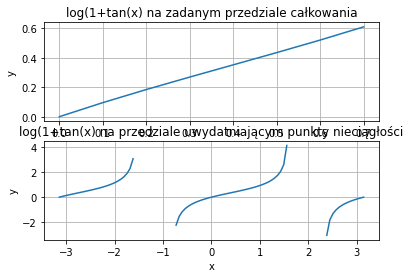

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import integrate

f = lambda x: np.log(1 + np.tan(x))
dx = 0.1
x = np.arange(0, np.pi/4, dx)

period_x = np.linspace (-np.pi, np.pi, 100)
plt.subplot(2,1,1)
plt.plot(x, f(x))
plt.title("log(1+tan(x) na zadanym przedziale całkowania")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

plt.subplot(2,1,2)
plt.plot(period_x, f(period_x))
plt.title("log(1+tan(x) na przedziale uwydatniającym punkty nieciągłości")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

**Metoda trapezów - zmienna długość wektora**

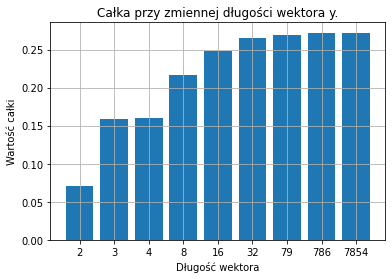

In [21]:
#Metoda trapezów
dx_list = [0.4, 0.3, 0.2, 0.1, 0.05, 0.025, 0.01, 0.001, 0.0001]
trapz_meth = []
x_len = []

for dx in dx_list:
    x = np.arange(0, np.pi/4, dx)
    trapz_meth.append(scipy.integrate.trapz(f(x), x))
    x_len.append(len(x))

plt.bar(range(len(trapz_meth)), trapz_meth)
plt.xticks(range(len(trapz_meth)), (str(i) for i in x_len))

plt.title("Całka przy zmiennej długości wektora y.")
plt.xlabel("Długość wektora")
plt.ylabel("Wartość całki")
plt.grid()
plt.show()

**Metoda trapezów - zmienny krok dx**

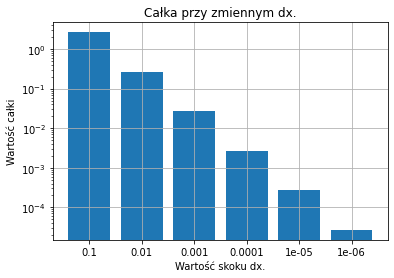

In [22]:
#zależność od dx

trapz_meth = []
dx_list = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
x = np.arange(0, np.pi/4, 0.01)

for dx in dx_list:
    trapz_meth.append(scipy.integrate.trapz(f(x), dx=dx))

plt.bar(range(len(dx_list)), trapz_meth)
plt.xticks(range(len(dx_list)), (str(i) for i in dx_list))

plt.title("Całka przy zmiennym dx.")
plt.xlabel("Wartość skoku dx.")
plt.ylabel("Wartość całki")
plt.yscale("log")
plt.grid()
plt.show()


**Metoda Simpsona - zmienna długość wektora**

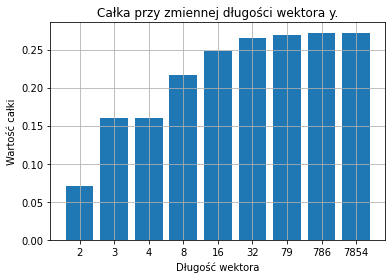

In [23]:
#Metoda Simpsona
dx_list = [0.4, 0.3, 0.2, 0.1, 0.05, 0.025, 0.01, 0.001, 0.0001]
simps_meth = []
x_len = []

for dx in dx_list:
    x = np.arange(0, np.pi/4, dx)
    simps_meth.append(scipy.integrate.simps(f(x), x))
    x_len.append(len(x))

plt.bar(range(len(simps_meth)), simps_meth)
plt.xticks(range(len(simps_meth)), (str(i) for i in x_len))

plt.title("Całka przy zmiennej długości wektora y.")
plt.xlabel("Długość wektora")
plt.ylabel("Wartość całki")
plt.grid()
plt.show()

**Metoda Simpsona - zmienny krok dx**

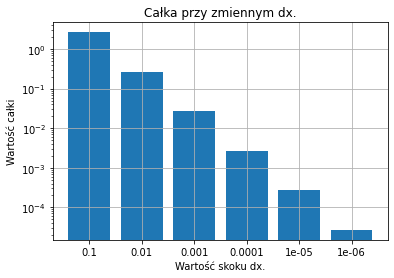

In [20]:
#zależność od dx

simps_meth = []
dx_list = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
x = np.arange(0, np.pi/4, 0.01)

for dx in dx_list:
    simps_meth.append(scipy.integrate.simps(f(x), dx=dx))

plt.bar(range(len(dx_list)), simps_meth)
plt.xticks(range(len(dx_list)), (str(i) for i in dx_list))

plt.title("Całka przy zmiennym dx.")
plt.xlabel("Wartość skoku dx.")
plt.ylabel("Wartość całki")
plt.yscale("log")
plt.grid()
plt.show()


**Metoda Romberga - zmienny krok dx**

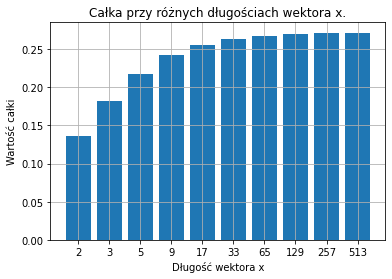

In [35]:
#zależność od dx

romb_meth = []
x_len = []
for dx in range(0,10):
    x = np.linspace(0, np.pi/4, 2**dx + 1)
    romb_meth.append(scipy.integrate.romb(f(x), dx=np.pi/4/(2**dx+1)))
    x_len.append(len(x))

plt.bar(range(len(romb_meth)), romb_meth)
plt.xticks(range(len(romb_meth)), (str(i) for i in x_len))

plt.title("Całka przy różnych długościach wektora x.")
plt.xlabel("Długość wektora x")
plt.ylabel("Wartość całki")
plt.grid()
plt.show()

**Porównanie z funkcjami podanymi w treści**

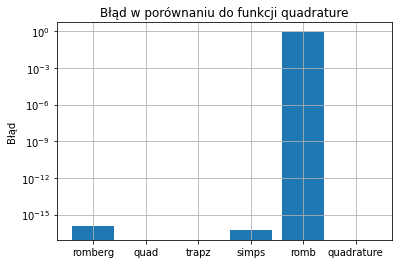

In [42]:
quadrature, _ = scipy.integrate.quadrature(f, 0, np.pi/4)
romberg = scipy.integrate.romberg(f, 0, np.pi/4)
quad, _ = scipy.integrate.quad(f, 0, np.pi/4)

x = np.linspace(0, np.pi/4, 2**10+1)

trapz = scipy.integrate.trapz(f(x), x)
simps = scipy.integrate.simps(f(x), x)
romb = scipy.integrate.romb(f(x), dx=np.pi/4/(2**8 + 1))

labels = ['romberg', 'quad', 'trapz', 'simps', 'romb', 'quadrature']
int_values = np.abs(quadrature - np.array([romberg, quad, trapz, simps, romb, quadrature]))
x_val = np.arange(6)
plt.bar(x_val, int_values)
plt.xticks(x_val, labels)
plt.yscale("log")
plt.title("Błąd w porównaniu do funkcji quadrature")
plt.ylabel("Błąd")
plt.grid()
plt.show()

**Porównanie czasowe**

*quadrature*

In [54]:
%%timeit -r 100 -n 100
quadrature, _ = scipy.integrate.quadrature(f, 0, np.pi/4)

The slowest run took 8.80 times longer than the fastest. This could mean that an intermediate result is being cached.
43.6 µs ± 26 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


*romberg*

In [55]:
%%timeit -r 100 -n 100
romberg = scipy.integrate.romberg(f, 0, np.pi/4)

26.2 µs ± 3.34 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


*quad*

In [56]:
%%timeit -r 100 -n 100
quad, _ = scipy.integrate.quad(f, 0, np.pi/4)

The slowest run took 19.56 times longer than the fastest. This could mean that an intermediate result is being cached.
64.7 µs ± 75.3 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


*trapz*

In [57]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**8+1)
trapz = scipy.integrate.trapz(f(x), x)

62.2 µs ± 23.7 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


*simps*

In [58]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**8+1)
simps = scipy.integrate.simps(f(x), x)

85 µs ± 30.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


*romb*

In [59]:
%%timeit -r 100 -n 100
x = np.linspace(0, np.pi/4, 2**8+1)
romb = scipy.integrate.romb(f(x), dx=np.pi/4/(2**10 + 1))



The slowest run took 5.33 times longer than the fastest. This could mean that an intermediate result is being cached.
116 µs ± 57.6 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)


1. Całkowanie nie jest możliwe na każdym przedziale, funkcja tan(x) ma punkty nieciągłości w k * pi + pi/2 dla k całkowitego.
2. Długość wektora y i krok dx ma znaczący wpływ na wynik całki. Metoda Romberga potrzebuje zdecydowanie najkrótszego wektora w celu zwrócenia prawidłowego wyniku.
3. Wszystkie funkcje zwracają wynik bliski zera maszynowego, jedynie funkcja romb odznacza się nadwyraz wysokim błędem (być może wynika to z błędu implementacji, gdyż funkcja bazująca na tej samej metodzie, lecz o innej implementacji generuje wynik bliski zera maszynowego).
4. Najszybszą funkcją, jest implementacja metody romberga, odznacza się ona też bardzo niskim odchyleniem. Reszta funkcji jest dwu lub trzykrotnie wolniejsza. Najmniej wydajna jest funkcja romb.

***Zadanie 2.***  
Dla funkcji 

$$f(x) = e^{x^2}$$

wyznacz numerycznie wartośc całki na przedziale $a = 0$, $b=1$  w  taki sam sposób jak w zadaniu 1.

Jako metodę do wyznaczenia wartości całki z wyżej podanej funkcji wybrałem funkcję quadrature

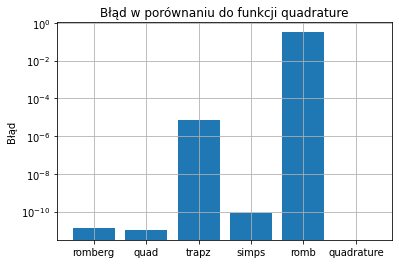

In [62]:
f = lambda x: np.exp(x**2)

quadrature, _ = scipy.integrate.quadrature(f, 0, 1)
romberg = scipy.integrate.romberg(f, 0, 1)
quad, _ = scipy.integrate.quad(f, 0, 1)

x = np.linspace(0, 1, 2**8+1)

trapz = scipy.integrate.trapz(f(x), x)
simps = scipy.integrate.simps(f(x), x)
romb = scipy.integrate.romb(f(x), dx=np.pi/4/(2**8 + 1))

labels = ['romberg', 'quad', 'trapz', 'simps', 'romb', 'quadrature']
int_values = np.abs(quadrature - np.array([romberg, quad, trapz, simps, romb, quadrature]))
x_val = np.arange(6)
plt.bar(x_val, int_values)
plt.xticks(x_val, labels)
plt.yscale("log")
plt.title("Błąd w porównaniu do funkcji quadrature")
plt.ylabel("Błąd")
plt.grid()
plt.show()